In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

PARA 1 VIDEO

In [ ]:
 V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Parkinson_Subject/ParkinsonianPostural3_2.mp4")
print("numero de frames: ", V.get(cv.CAP_PROP_FRAME_COUNT))
print("pos del frame", V.get(cv.CAP_PROP_POS_FRAMES))
frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
print ("tipo: ", type(frames), "longitud: ", len(frames))
print ("en una posición i del frames: ", type(frames[10]), frames[10].shape)

numero de frames:  300.0
pos del frame 0.0
tipo:  <class 'list'> longitud:  298
en una posición i del frames:  <class 'numpy.ndarray'> (320, 480, 3)


In [ ]:
array_video =np.array(frames)
print(array_video.shape)

(298, 320, 480, 3)


(298, 480, 3)


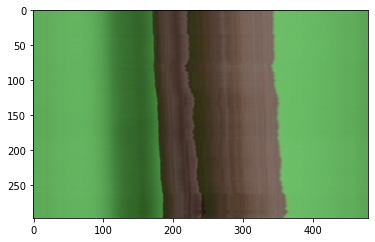

In [ ]:
slice=array_video[:,220,:,:]
plt.imshow(slice)
print(slice.shape)

PARA TODOS LOS VIDEOS

In [ ]:
control = []
y = []

lista_videos = np.sort(os.listdir("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Control_Subject/"))
lista_videos2 = lista_videos[:20]
for video in lista_videos2:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Control_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  control.append(frames) 

control = np.r_[control]

print(control.shape)

slices_control2 = []
for video in control:
  slices_control2.append(video[:,220,:,:])
  y.append(0) # Control_Subject

slices_control2 =np.r_[slices_control2]

(20, 298, 320, 480, 3)


In [ ]:
control = []

lista_videos3 = lista_videos[21:]
for video in lista_videos3:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Control_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  control.append(frames) 

control = np.r_[control]

print(control.shape)

slices_control3 = []
for video in control:
  m = video[:,220,:,:]
  y.append(0) # Control_Subject
  slices_control3.append(m)

slices_control3 =np.r_[slices_control3]

(19, 298, 320, 480, 3)


In [ ]:
slices_control1 = np.concatenate((slices_control2, slices_control3), axis=0)
slices_control1.shape

(39, 298, 480, 3)

In [ ]:
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/slices_control", slices_control1)

In [ ]:
parkinson = []
lista_videos = np.sort(os.listdir("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Parkinson_Subject/"))
lista_videos2 = lista_videos[:20]
for video in lista_videos2:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Parkinson_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  parkinson.append(frames) 

parkinson = np.r_[parkinson]

slices_parkinson2 = []
for video in parkinson:
  slices_parkinson2.append(video[:,220,:,:])
  y.append(1) # Parkinson_Subject

slices_parkinson2 =np.r_[slices_parkinson2]


In [ ]:
parkinson = []

lista_videos3 = lista_videos[21:]
for video in lista_videos3:
  V = cv.VideoCapture("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/Parkinson_Subject/" + video)
  frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
  frames = np.r_[frames]
  parkinson.append(frames) 

parkinson = np.r_[parkinson]

slices_parkinson3 = []
for video in parkinson:
  slices_parkinson3.append(video[:,220,:,:])
  y.append(1) # Parkinson_Subject

slices_parkinson3 =np.r_[slices_parkinson3]

In [ ]:
slices_parkinson1 = np.concatenate((slices_parkinson2, slices_parkinson3), axis=0)

In [ ]:
slices_parkinson1.shape

(39, 287, 480, 3)

In [ ]:
y = np.r_[y]
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/slices_parkinson", slices_parkinson1)
np.save("/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/etiquetas", y)

LEER DATOS!

In [3]:
X1 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/slices_control.npy', allow_pickle=True)
X2 = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/slices_parkinson.npy',  allow_pickle=True)
X = np.concatenate((X1, X2), axis=0)
y = np.load('/content/drive/My Drive/IA2/Proyecto/Hand_Tremor/Standard/slices/etiquetas.npy',  allow_pickle=True)

In [4]:
X.shape , y.shape

((78, 298, 480, 3), (78,))

In [5]:
perm = np.random.permutation(range(len(X)))
X=X[perm]
y=y[perm]

porcentaje = int(X.shape[0]*0.8)
X_test = X[porcentaje:]
y_test = y[porcentaje:]

X_train = X[:porcentaje]
y_train = y[:porcentaje]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

((16, 298, 480, 3), (16,), (62, 298, 480, 3), (62,))

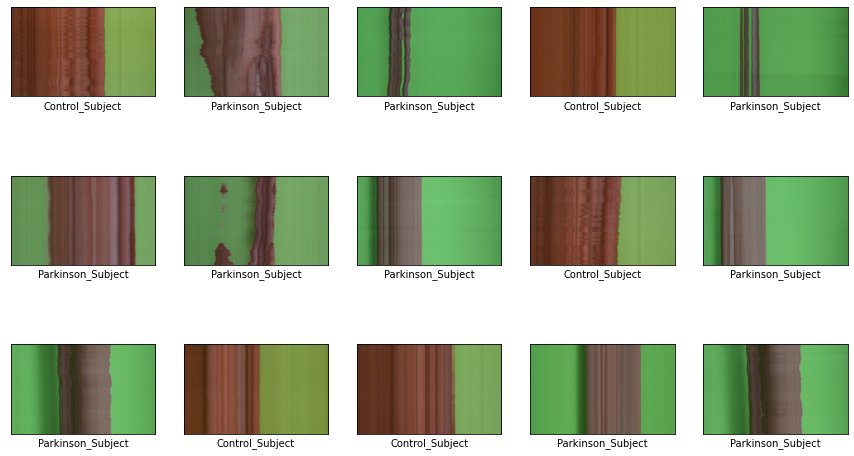

In [6]:
class_names = ['Control_Subject', 'Parkinson_Subject']
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(298,480,3))
    plt.xlabel(class_names[y_train[i]])

In [7]:
X_train = X_train.reshape([-1, 298, 480, 3])
X_test = X_test.reshape([-1, 298, 480, 3])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', X_test.shape[0], "y_test: ", y_test.shape)

X_train shape: (62, 298, 480, 3)
Number of images in x_train 62 y_train: (62, 2)
Number of images in x_test 16 y_test:  (16, 2)


In [8]:
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(298, 480, 3)))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())    
model_CNN.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(2, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 480, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 240, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 240, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 120, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 568320)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                18186272  
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [9]:
opt = tf.keras.optimizers.SGD()
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model_CNN.fit(X_train, y_train, epochs=7 ,verbose=1, batch_size=16,validation_data=(X_test, y_test))

Epoch 1/7
4/4 [==============================] - 1s 200ms/step - loss: 0.6947 - accuracy: 0.5323 - val_loss: 0.6714 - val_accuracy: 0.3750
Epoch 2/7
4/4 [==============================] - 0s 80ms/step - loss: 0.6742 - accuracy: 0.5645 - val_loss: 0.6244 - val_accuracy: 0.3750
Epoch 3/7
4/4 [==============================] - 0s 82ms/step - loss: 0.6325 - accuracy: 0.5645 - val_loss: 0.5836 - val_accuracy: 0.5625
Epoch 4/7
4/4 [==============================] - 0s 76ms/step - loss: 0.3866 - accuracy: 0.8871 - val_loss: 0.2376 - val_accuracy: 1.0000
Epoch 5/7
4/4 [==============================] - 0s 77ms/step - loss: 0.3197 - accuracy: 0.9032 - val_loss: 0.8614 - val_accuracy: 0.6250
Epoch 6/7
4/4 [==============================] - 0s 80ms/step - loss: 0.6346 - accuracy: 0.7419 - val_loss: 0.2172 - val_accuracy: 1.0000
Epoch 7/7
4/4 [==============================] - 0s 79ms/step - loss: 0.1846 - accuracy: 1.0000 - val_loss: 0.0776 - val_accuracy: 1.0000


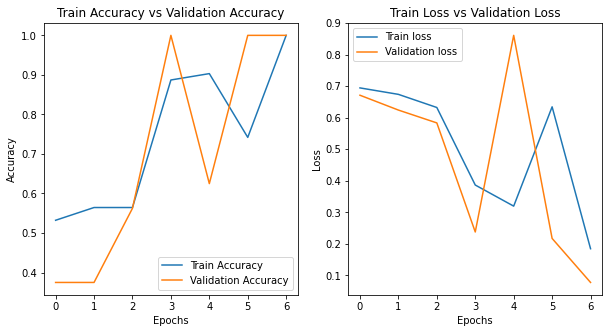

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
plt.title("Train Accuracy vs Validation Accuracy")  
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Validation loss');
ax.legend();
plt.title("Train Loss vs Validation Loss")  
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [12]:
test_loss,test_acc = model_CNN.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 1.0000
Test accuracy: 1.0


valor predicho: 0  clase:  Control_Subject
max prob:  0.8835351 ground truth:  Control_Subject
(16, 2)


<Figure size 432x288 with 0 Axes>

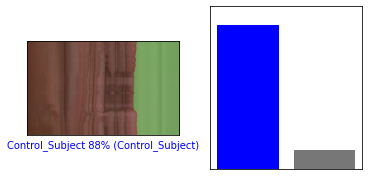

In [13]:
%run '/content/drive/My Drive/IA2/Proyecto/dl_plot2.py'

index_vector =  4#@param {type:"integer"}

predictions = model_CNN.predict(X_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(y_test ,axis=1), X_test)
plt.subplot(1,2,2)
plot_value_array(index_vector, predictions,  np.argmax(y_test ,axis=1))

<Figure size 432x288 with 0 Axes>

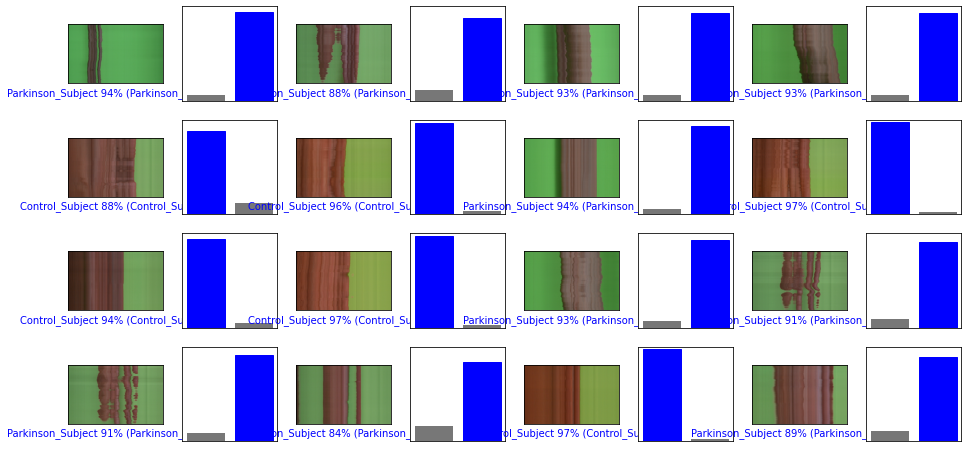

In [14]:
%run '/content/drive/My Drive/IA2/Proyecto/dl_plot2.py'

predictions = model_CNN.predict(X_test)

num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))